In [50]:
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

In [51]:
import pandas as pd

In [52]:
import numpy as np

In [53]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [54]:
import torch
from sentence_transformers import SentenceTransformer
if torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')
model = SentenceTransformer('all-MiniLM-L6-v2', device=device)
print("Model is loaded on:", model.device)

/Users/bensmus/Desktop/Projects/AG_news_classify/myenv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Model is loaded on: mps:0


In [55]:
filename = 'AG_news_dataset/train.csv'
df = pd.read_csv(filename)
descriptions = np.array(df['Description'])
categories = np.array(df['Class Index'] - 1) # This -1 is CRUCIAL because classes must be 0...N-1 where N is number of classes.
descriptions, categories = shuffle(descriptions, categories, random_state=0)


In [56]:
embeddings = model.encode(descriptions)

In [8]:
# pca = PCA(n_components=50)
# embeddings = pca.fit_transform(embeddings)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(embeddings, categories, test_size=0.2, random_state=42)

In [181]:
inputs = tf.keras.Input(shape=(384,))
x = layers.Dense(200, activation='relu')(inputs)
x = layers.Dropout(0.5)(x)
x = layers.Dense(160, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(80, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)     │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 200)            │        77,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 160)            │        32,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 120)            │        19,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 4)              │           324 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,484 (540.95 KB)

 Trainable params: 138,484 (540.95 KB)

 Non-trainable params: 0 (0.00 B)

In [182]:
model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [183]:
history = model.fit(X_train, y_train, epochs=100, batch_size=35, validation_data=(X_val, y_val))

Epoch 1/100
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5186 - loss: 1.0454 - val_accuracy: 0.8850 - val_loss: 0.3475
Epoch 2/100
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8686 - loss: 0.4359 - val_accuracy: 0.8911 - val_loss: 0.3294
Epoch 3/100
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8828 - loss: 0.3853 - val_accuracy: 0.8939 - val_loss: 0.3161
Epoch 4/100
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8841 - loss: 0.3784 - val_accuracy: 0.8959 - val_loss: 0.3067
Epoch 5/100
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8868 - loss: 0.3618 - val_accuracy: 0.8988 - val_loss: 0.3002
Epoch 6/100
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8910 - loss: 0.3463 - val_accuracy: 0.9002 - val_loss: 0.2948
Epoch 7/100
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8938 - loss: 0.3368 - val_accuracy: 0.9003 - val_loss: 0.2899
Epoch 8/100
2743/2743 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8963 - loss: 0

In [184]:
y_val_predict_probs = model.predict(X_val)

750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step


In [185]:
y_val_predict = np.argmax(y_val_predict_probs, axis=1)

In [186]:
print('val accuracy', sum(y_val_predict == y_val) / len(y_val))

val accuracy 0.912875


In [189]:
val_accuracy = history.history['val_accuracy']
train_accuracy = history.history['accuracy']

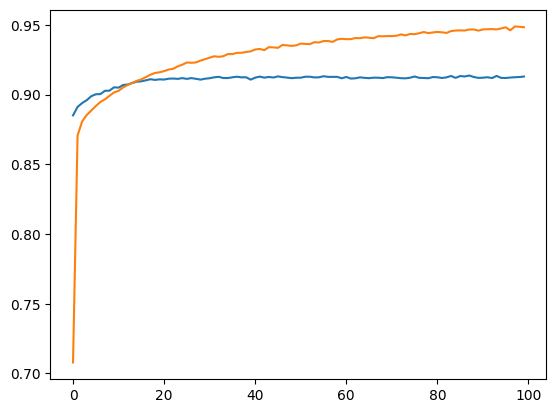

In [190]:
import  matplotlib.pyplot as plt
plt.plot(val_accuracy)
plt.plot(train_accuracy)